In [1]:
 import numpy as np
 from sklearn.linear_model import LinearRegression

 x = [[2], [4], [6], [8], [10], [12], [14], [16], [18], [20]]
 y = [1, 4, 7, 10, 13, 16, 19, 21, 24, 27]

 regr = LinearRegression().fit(x,y)
 regr.score(x,y)

 predict = np.array([[6]])

 print ("Prediksi")
 print ("Input = ", predict)
 print ("Output = ", regr.predict(predict))

Prediksi
Input =  [[6]]
Output =  [7.01818182]


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np

x = [[0], [4], [8], [12], [16], [20], [24], [28], [32], [36]]
y = [0, 3, 8, 15, 24, 35, 48, 63, 80, 99]

predict = np.array ([[12]])
poly = PolynomialFeatures(degree=2)
x_ = poly.fit_transform(x)
predict_ = poly.fit_transform(predict)
regr = linear_model.LinearRegression()
regr.fit (x_,y)

print ("Prediksi")
print ("Input = ", predict)
print ("Output = ", regr.predict(predict_))

Prediksi
Input =  [[12]]
Output =  [15.]


Mean Squared Error (Linear): 56.32
Mean Squared Error (POlinomial Degree 2): 56.32


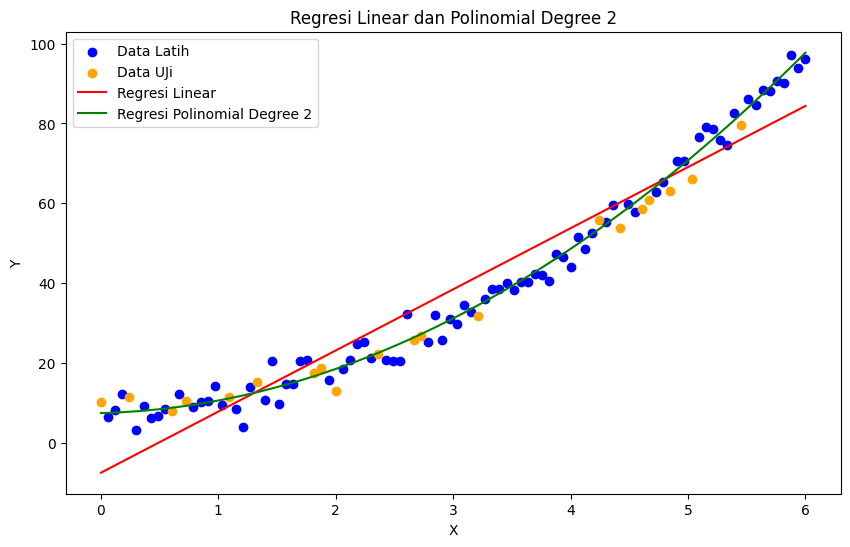

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Membuat dataset (hanya nilai positif untuk X)
np.random.seed(0)
X = np.linspace(0, 6, 100).reshape(-1, 1)
Y = 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 3

# Membagi dataset menjadi data latih dan uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat model regresi linear
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Membuat model regresi polinomial derajat 2
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
poly_model_2 = LinearRegression()
poly_model_2.fit(X_train_poly_2, Y_train)

# Membuat prediksi untuk keseluruhan dataset
X_sorted = np.sort(X, axis=0) # Urutan X untuk membuat plot mulus
Y_pred_linear_all = linear_model.predict(X_sorted)
Y_pred_poly_2_all = poly_model_2.predict(poly_features_2.transform(X_sorted))

# Evaluasi model
mse_linear = mean_squared_error(Y_test, linear_model.predict(X_test))
mse_poly_2 = mean_squared_error(Y_test, poly_model_2.predict(poly_features_2.transform(X_test)))

print(f"Mean Squared Error (Linear): {mse_linear:.2f}")
print(f"Mean Squared Error (POlinomial Degree 2): {mse_linear:.2f}")

# Plot hasil regresi untuk seluruh dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='blue', label='Data Latih') # Data Latih
plt.scatter(X_test, Y_test, color='orange', label='Data UJi') # Data Uji
plt.plot(X_sorted, Y_pred_linear_all, color='red', label='Regresi Linear') # Garis Regresi Linear
plt.plot(X_sorted, Y_pred_poly_2_all, color='green', label='Regresi Polinomial Degree 2') # Garis Regresi Polinomial Degree 2
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresi Linear dan Polinomial Degree 2')
plt.legend()
plt.show()
